C:\Users\Sander\AppData\Local\Temp\ipykernel_10352\3424698024.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



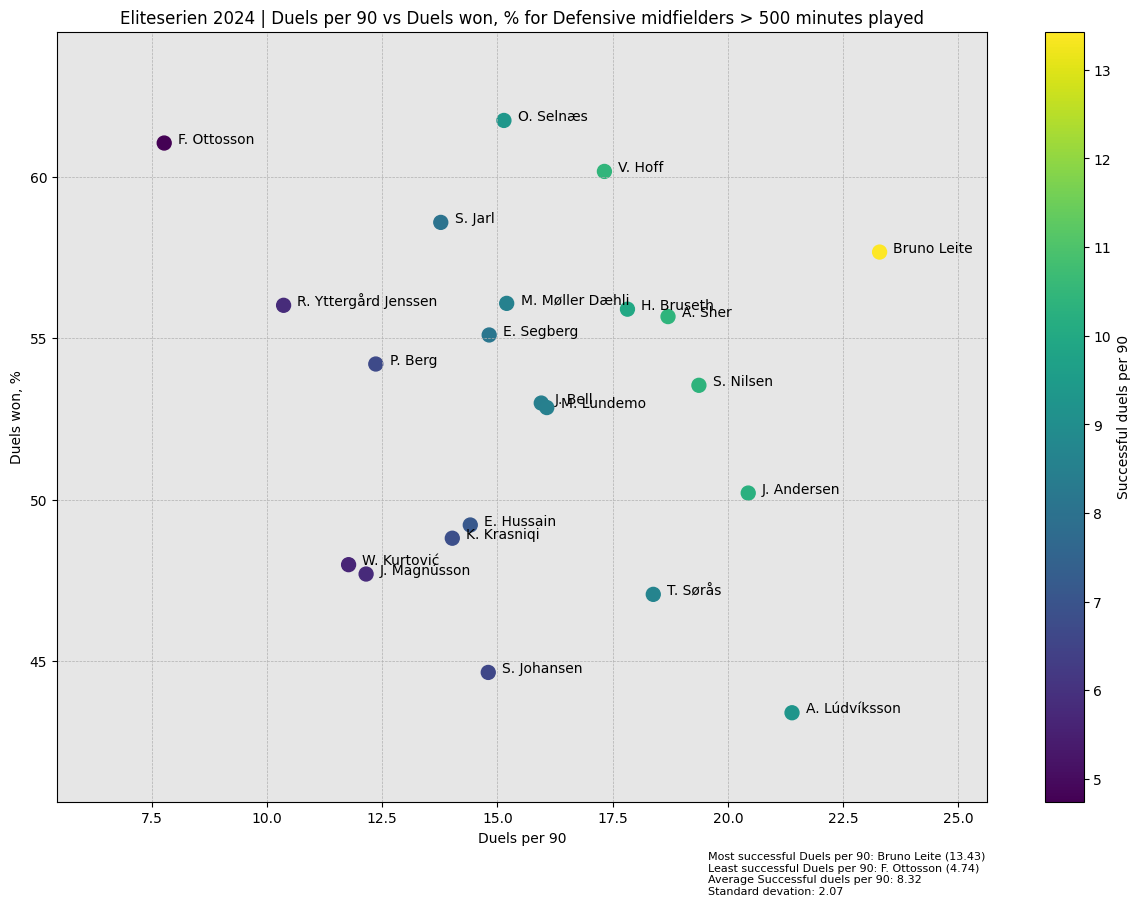

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import requests
from matplotlib import font_manager
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import seaborn as sns
import json
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import plotly.express as px


df = pd.read_csv(r'C:\Users\Sander\Downloads\Wyscout_Prospect_Research-main\Wyscout_Prospect_Research-main\Main App\Eliteserien 2024.csv')

'''RETURNS A DATAFRAME OF PLAYERS WHO PLAY IN A CERTAIN POSITION WITH MORE THAN 1000 MINUTES PLAYED
   This line of code prints out all unique positions in the dataset: unique_position_names = print(df['Position'].unique())'''
def player_data(position):
    return df[(df['Position'].str.contains(position, case=False)) & (df['Primary position'].str.contains(position, case=False)) & (df['Minutes played'] > 500)]
    
'''Choose the position you want to analyze. Uncomment this code to get all the alternatives: #print(df['Position'].unique())'''
get_player_position =  player_data('dmf')
attackers = player_data('f')


def plot(val1, val2, val3, val4):
    '''Normalize the data to get a color gradient based on val1'''
    if get_player_position.empty:
        print("No data available for the specified position.")
        return
    get_player_position[val3] = (get_player_position[val1]*get_player_position[val2])/100
    norm = plt.Normalize(get_player_position[val3].min(), get_player_position[val3].max())
    colors = plt.cm.viridis(norm(get_player_position[val3]))
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(get_player_position[val1].values.reshape(-1,1))
    model = LinearRegression().fit(x_poly, get_player_position[val2])
    fig, ax = plt.subplots(figsize=(15,10))
    light_gray_with_transparency = (0.9, 0.9, 0.9, 1) 
    # fig.patch.set_facecolor(light_gray_with_transparency)
    ax.set_facecolor(light_gray_with_transparency)
    scatter=ax.scatter(get_player_position[val1], get_player_position[val2], color=colors, s = 100 )
                    #    s=get_player_position[val3]*10)
    ax.set_xlabel(val1)
    ax.set_ylabel(val2)
    ax.set_title(f'Eliteserien 2024 | {val1} vs {val2} for {val4} > 500 minutes played')
    ax.margins(0.15)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)   
    for i, txt in enumerate(get_player_position['Player']):
        ax.annotate(txt, (get_player_position[val1].iloc[i], get_player_position[val2].iloc[i]), xytext=(10,0), textcoords='offset points')
    if r2_score(get_player_position[val1], model.predict(x_poly)) > 0.5:
        ax.text(0.7, -0.12, f'Most successful {val1}: {get_player_position.loc[get_player_position[val3].idxmax()]['Player']} ({get_player_position[val3].max():.2f})\nLeast successful {val1}: {get_player_position.loc[get_player_position[val3].idxmin()]['Player']} ({get_player_position[val3].min():.2f})\nAverage {val3}: {get_player_position[val3].mean():.2f}\nStandard devation: {get_player_position[val3].std():.2f}\nR2 score: {r2_score(get_player_position[val1], model.predict(x_poly)):.2f}',
            fontsize=8,
            transform=ax.transAxes)
        ax.plot(get_player_position[val1], model.predict(x_poly), color='grey', alpha = 0.5)
    else:
        ax.text(0.7, -0.12, 
                f'Most successful {val1}: {get_player_position.loc[get_player_position[val3].idxmax()]['Player']} ({get_player_position[val3].max():.2f})\nLeast successful {val1}: {get_player_position.loc[get_player_position[val3].idxmin()]['Player']} ({get_player_position[val3].min():.2f})\nAverage {val3}: {get_player_position[val3].mean():.2f}\nStandard devation: {get_player_position[val3].std():.2f}',
            fontsize=8,
            transform=ax.transAxes)
    # ax.text(0.005, -0.1, '@Fotbadlstat on X', bbox=dict(facecolor='pink', alpha=0.5, edgecolor='black'), fontsize=8, transform=ax.transAxes)
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(f'{val3}')
    # fig = px.scatter(get_player_position, x=val1, y=val2, color=val3, size=val3, text='Player')
    # fig.update_traces(textposition='top center')
    # fig.update_layout(title=f'Premier League 2024 | {val1} vs {val2} for {val4} > 150 minutes played')
    # fig.show()

    
plot('Duels per 90', 'Duels won, %', 'Successful duels per 90', 'Defensive midfielders')
# print(df['Position'].unique())
# print(len(df['Position'].unique()))